In [1]:
import pandas as pd
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np

from scipy.signal import find_peaks

import gc

In [2]:
def calc_direction(data, peaks):
    
    if len(peaks)%2:
        print('omitting last element')
        peaks = peaks[:-1]
        
    peaks_rolled = np.roll(peaks, -1)
    
    data_even = -data[peaks_rolled[::2]] + data[peaks[::2]]
    data_odd  = -data[peaks_rolled[::2]] + data[peaks_rolled[1::2]]
    
    data_combined = np.stack((data_even, data_odd), axis = 1).flatten()
    
    return (data_combined)

def calc_direction_vector(x, y, peaks):
    
    x_combined = calc_direction(x, peaks)
    y_combined = calc_direction(y, peaks)

    return np.array((x_combined, y_combined))

def calc_angle(x, y, peaks, angle='rad'):
    
    direction_vector = calc_direction_vector(x, y, peaks)    
    
    if angle == 'rad':
        return np.arctan2(direction_vector[0], direction_vector[1])
    elif angle == 'deg':
        return np.arctan2(direction_vector[0], direction_vector[1])*180/np.pi
    
def create_direction_df(data, start, end, angle='deg'):
    
    # lambda function to correction angle 
    correctHeading = lambda x: x + 360 if x < 0 else x
    
    # find deflection peaks
    peaks, _ = find_peaks(data[start:end].deflection)
    
    if len(peaks) % 2:        # odd number of peaks
        peaks = peaks[:-1]    # drop last element

    dirs = calc_direction_vector(data[start:end].pos_x.to_numpy(),
                                 data[start:end].pos_z.to_numpy(),
                                 peaks)

    angles = calc_angle(data[start:end].pos_x.to_numpy(),
                        data[start:end].pos_z.to_numpy(),
                        peaks,
                        angle
                       )

    directionDF = pd.DataFrame({'time'  : data[start:end].index[peaks], 
                                'dir_x' : dirs[0],
                                'dir_z' : dirs[1], 
                                'angle' : angles})

    # convert angle to go from 0 to 360 deg
    directionDF.angle = directionDF.angle.apply(correctHeading)
    
    directionDF.set_index('time', inplace=True)
    
    return directionDF

def report_plot(dataDF, directionDF, start, end):
    
    plt.figure(figsize=(5,5))
    plt.axis('equal')
    
        
    plt.plot(data[start:end].pos_x, data[start:end].pos_z, label='orbit')
    
    plt.plot([np.zeros(len(directionDF.dir_x)), directionDF.dir_x],
             [np.zeros(len(directionDF.dir_z)), directionDF.dir_z],
             # label='orbit axis',
             color='tab:orange',
            )
    
    plt.plot(directionDF.dir_x, directionDF.dir_z,label='orbit axis',
             color='tab:orange',
             alpha=0.5
            )

    plt.xlabel('X (m)')
    plt.ylabel('Z (m)')
    
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig('orbit {}.png'.format(start), dpi=150)
    
    ####################################################
    
    plt.figure(figsize=(9,5))
    ax = plt.gca()
    ax2 = ax.twinx()

    ax.plot(directionDF.angle, label='orbit axis angle')
    ax.plot(data[start:end].wind_dir_corr, label='wind dir due North', color='tab:red')
    ax.legend(loc='upper left')
    ax.set_xlabel('time')
    ax.set_ylabel('Degree')
    ax.set_ylim([0, 360])
    
    ax2.plot(data[start:end].wind_speed, label='wind speed', color='tab:green')
    ax2.legend(loc='upper right')
    ax2.set_ylabel('wind speed (m/s)')
    ax2.set_xlabel('time')
    plt.tight_layout()
    
    plt.savefig('angle {}.png'.format(start), dpi=150)

In [3]:
start = pd.to_datetime('2019-09-05 09:20 UTC')
end = pd.to_datetime('2019-09-05 09:23:00 UTC')
data = pd.read_pickle('../data/accelerations/tom/BW77_filtered_fused.pickle')

<IPython.core.display.Javascript object>


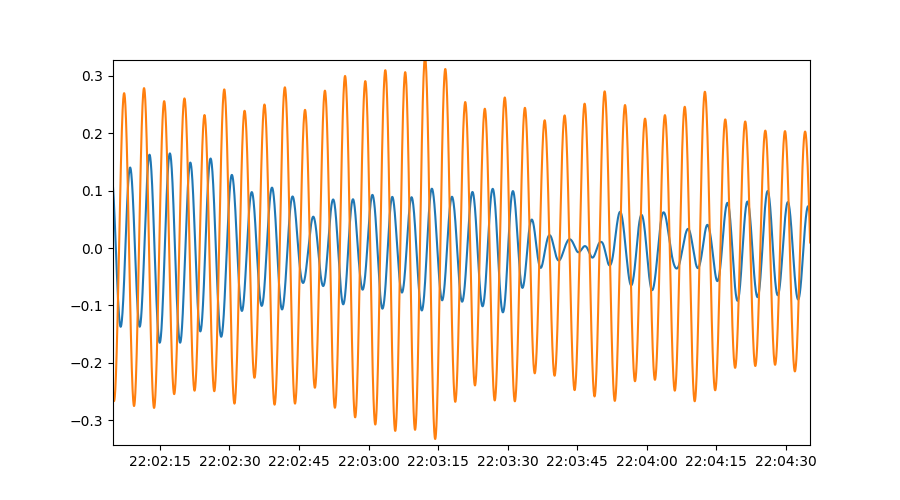

In [4]:
plt.figure(figsize=(9,5))
plt.plot(data.pos_z)
plt.plot(data.pos_x)

# Event 1: 2019-09-04 04:40 UTC, Peak factor 115 % harmonic

<IPython.core.display.Javascript object>


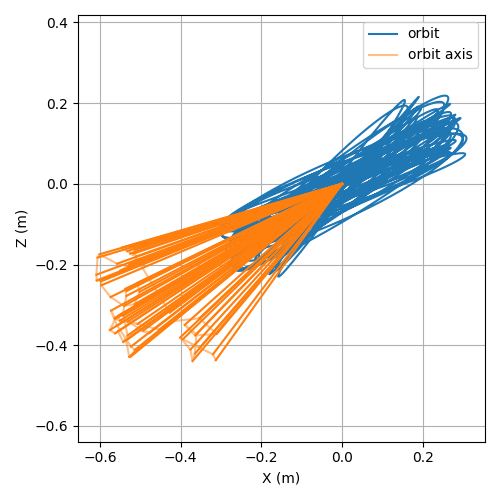

<IPython.core.display.Javascript object>


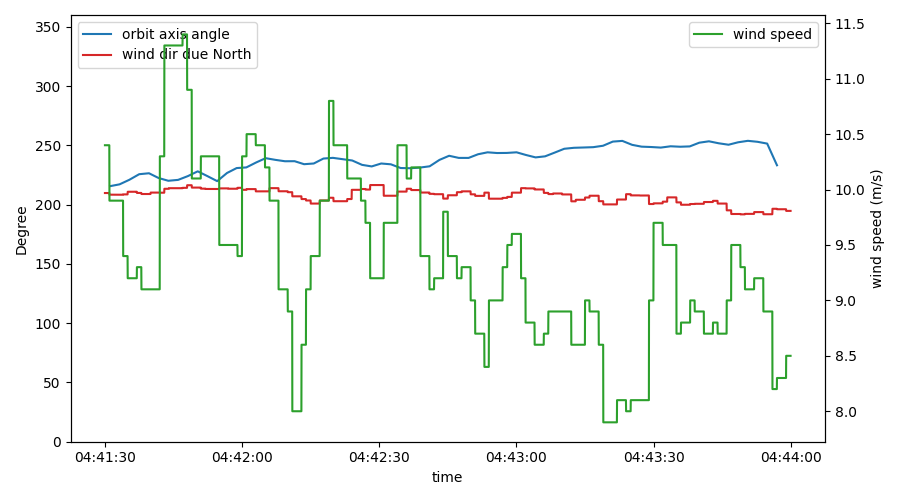

In [8]:
start = pd.to_datetime('2019-09-04 04:41:30 UTC')
end = pd.to_datetime('2019-09-04 04:44 UTC')

directionDF = create_direction_df(data, start, end)
report_plot(data, directionDF, start, end)


# Event 1: 2019-09-04 05:48 UTC, Peak factor 115 % harmonic

<IPython.core.display.Javascript object>


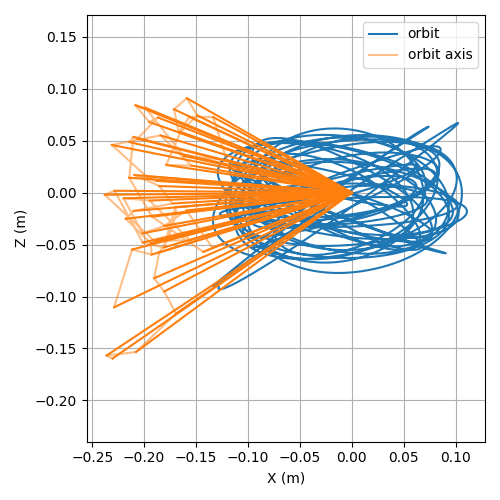

<IPython.core.display.Javascript object>


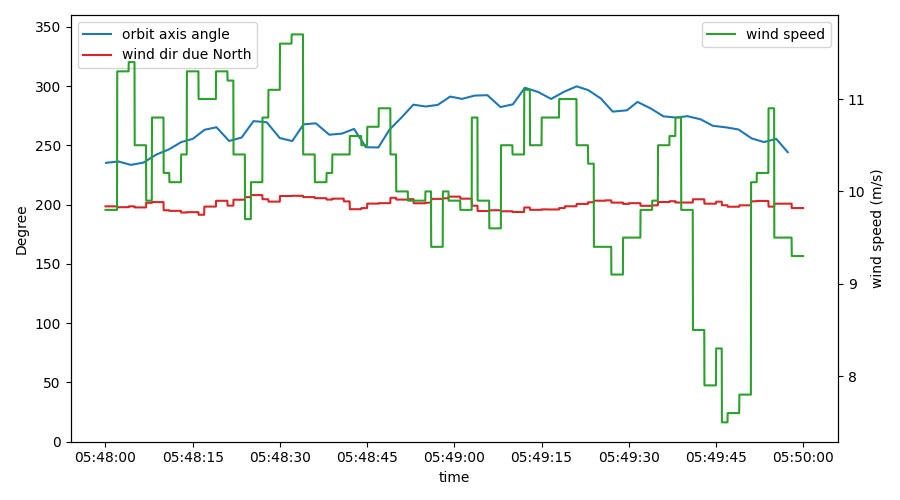

In [17]:
start = pd.to_datetime('2019-09-04 05:48 UTC')
end = pd.to_datetime('2019-09-04 05:50 UTC')

directionDF = create_direction_df(data, start, end)
report_plot(data, directionDF, start, end)


# Event 1: 2019-09-04 07:48 UTC, Peak factor 115 % harmonic

<IPython.core.display.Javascript object>


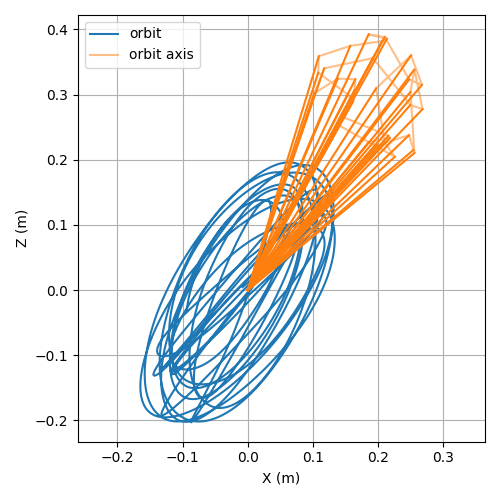

<IPython.core.display.Javascript object>


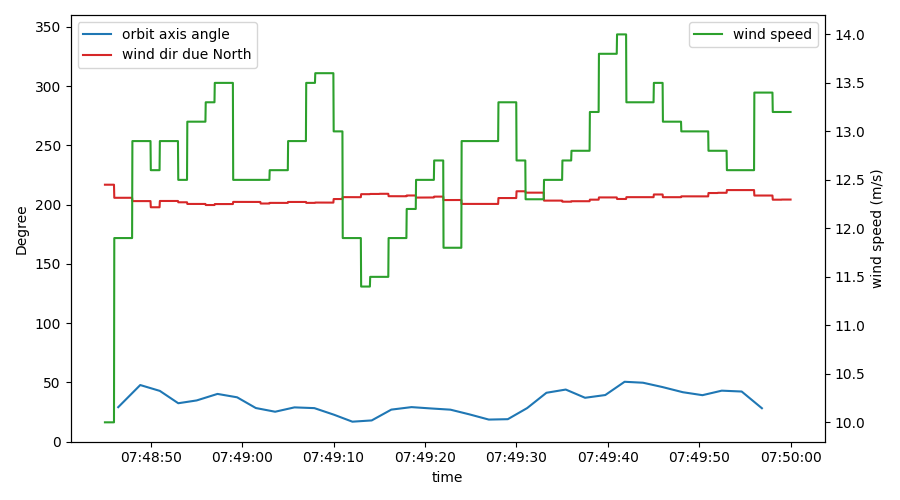

In [19]:
start = pd.to_datetime('2019-09-04 07:48:45 UTC')
end = pd.to_datetime('2019-09-04 07:50 UTC')

directionDF = create_direction_df(data, start, end)
report_plot(data, directionDF, start, end)


# Event 1: 2019-09-04 07:48 UTC, Peak factor 115 % harmonic

<IPython.core.display.Javascript object>


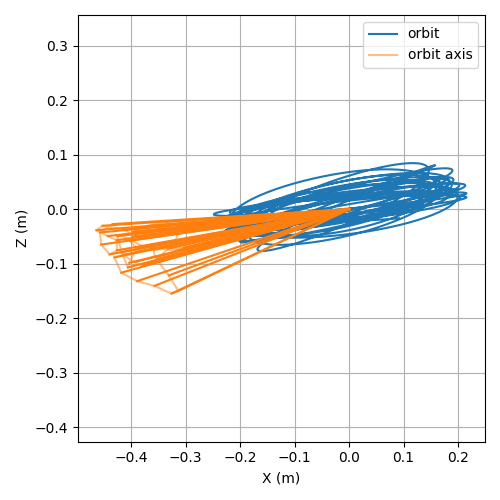

<IPython.core.display.Javascript object>


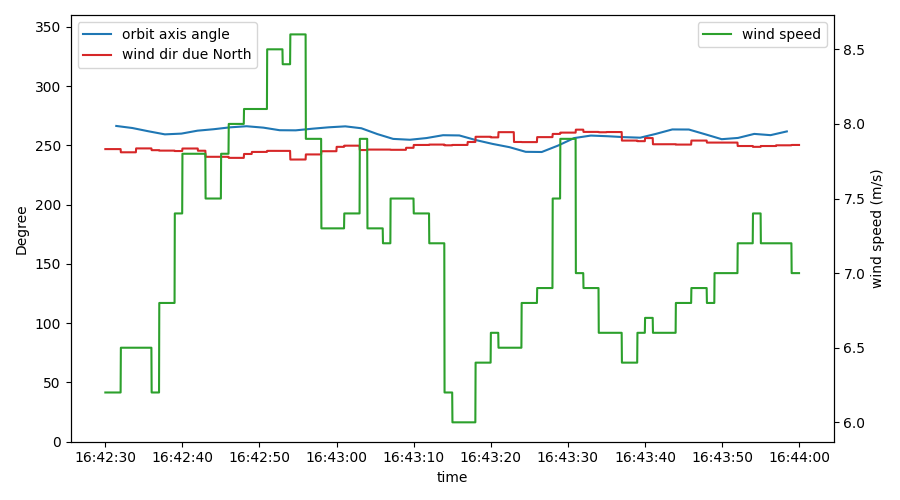

<IPython.core.display.Javascript object>


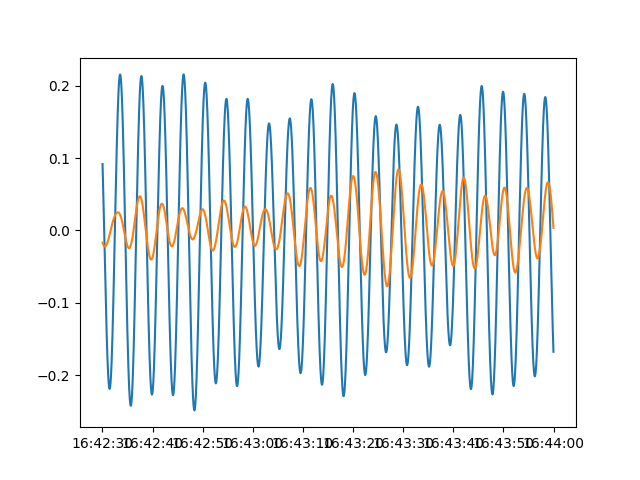

peak factor X: 1.5562780721639753
peak factor Z: 2.3975982518333074


In [25]:
start = pd.to_datetime('2019-09-04 16:42:30 UTC')
end = pd.to_datetime('2019-09-04 16:44 UTC')

directionDF = create_direction_df(data, start, end)
report_plot(data, directionDF, start, end)

plt.figure()
plt.plot(data[start:end].pos_x)
plt.plot(data[start:end].pos_z)

print('peak factor X: {}'.format(np.max(data[start:end].pos_x)/np.std(data[start:end].pos_x)))
print('peak factor Z: {}'.format(np.max(data[start:end].pos_z)/np.std(data[start:end].pos_z)))

<IPython.core.display.Javascript object>


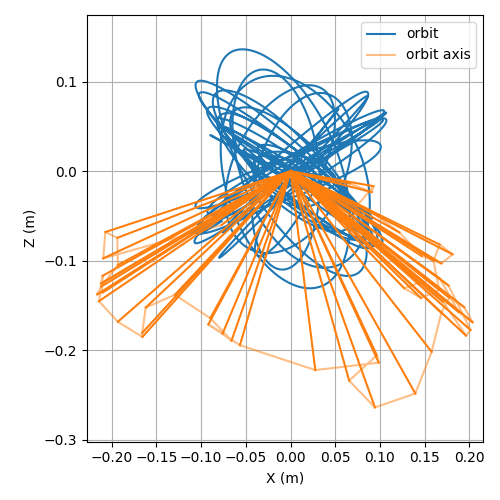

<IPython.core.display.Javascript object>


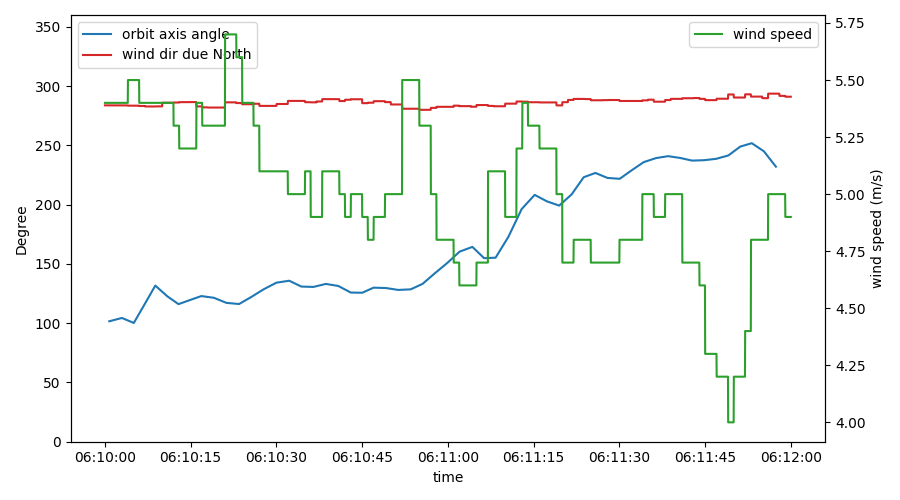

In [25]:
start = pd.to_datetime('2019-09-07 06:10 UTC')
end = pd.to_datetime('2019-09-07 06:12 UTC')

directionDF = create_direction_df(data, start, end)
report_plot(data, directionDF, start, end)


# Event II: 2019-09-07 10:16 UTC

<IPython.core.display.Javascript object>


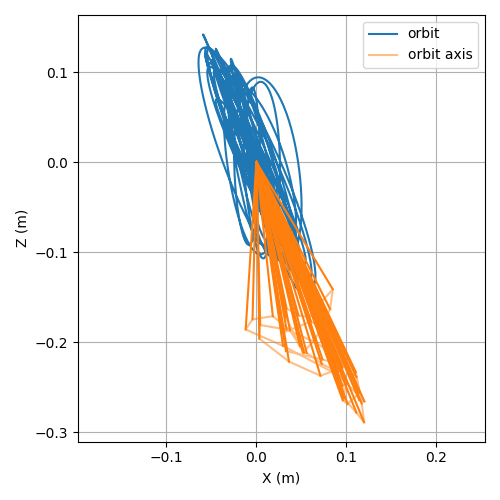

<IPython.core.display.Javascript object>


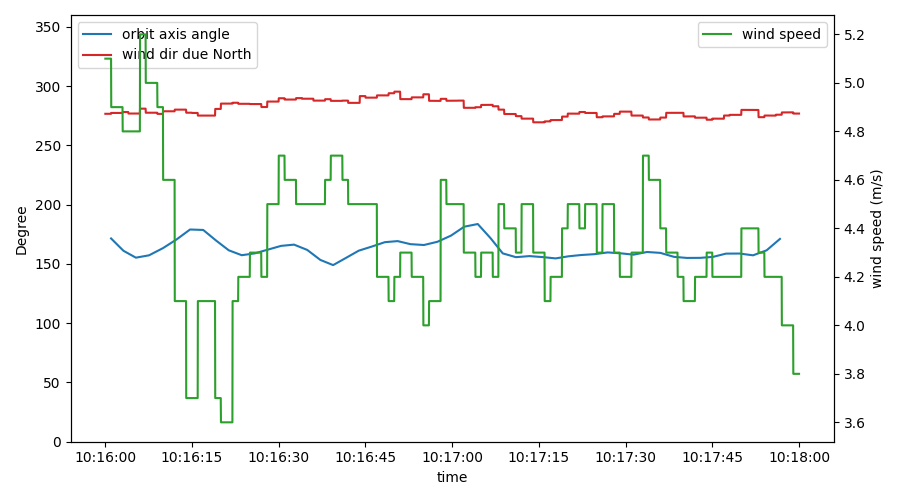

In [26]:
start = pd.to_datetime('2019-09-07 10:16 UTC')
end = pd.to_datetime('2019-09-07 10:18 UTC')

directionDF = create_direction_df(data, start, end)

report_plot(data, directionDF, start, end)

# Event III: 2019-09-07 7:42 UTC

<IPython.core.display.Javascript object>


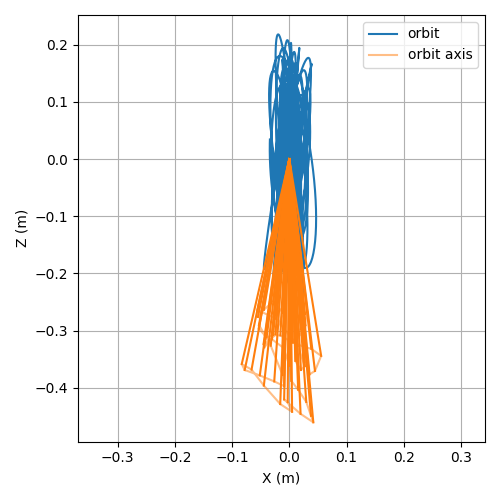

<IPython.core.display.Javascript object>


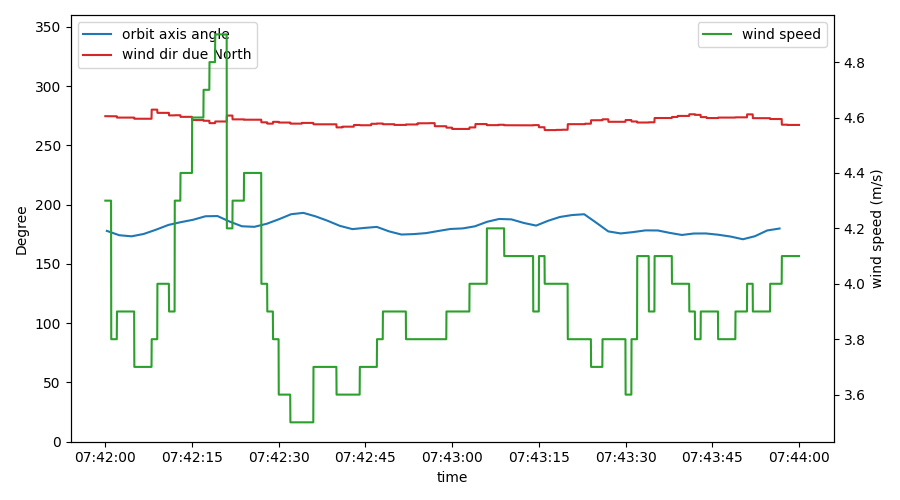

In [27]:
start = pd.to_datetime('2019-09-07 07:42 UTC')
end = pd.to_datetime('2019-09-07 07:44 UTC')

directionDF = create_direction_df(data, start, end)

report_plot(data, directionDF, start, end)

# Event IV: 2019-09-04 6:42 UTC

<IPython.core.display.Javascript object>


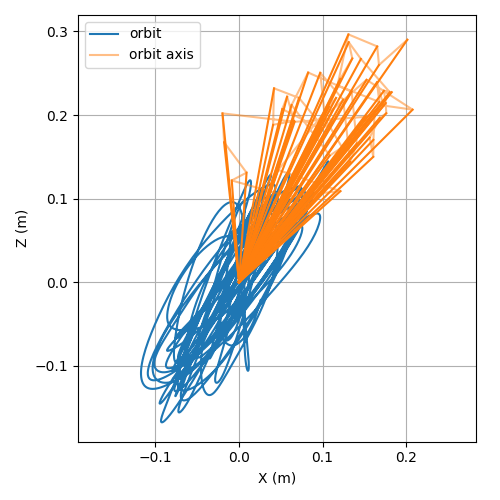

<IPython.core.display.Javascript object>


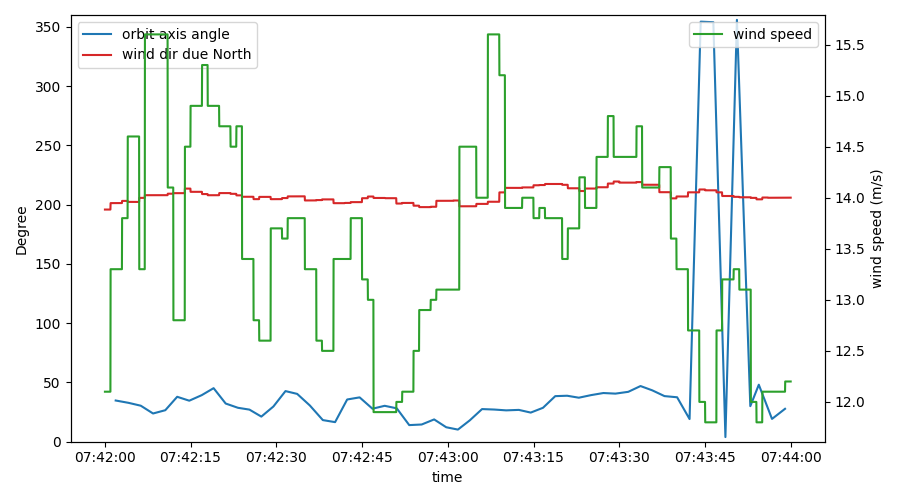

In [28]:
start = pd.to_datetime('2019-09-04 07:42 UTC')
end = pd.to_datetime('2019-09-04 07:44 UTC')

directionDF = create_direction_df(data, start, end)

report_plot(data, directionDF, start, end)

# Event V: 2019-09-04 12:16 UTC

<IPython.core.display.Javascript object>


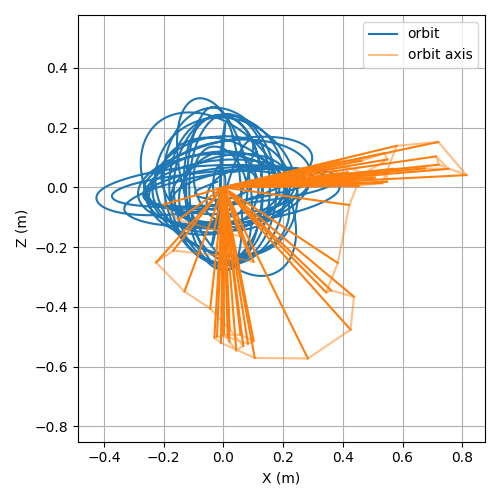

<IPython.core.display.Javascript object>


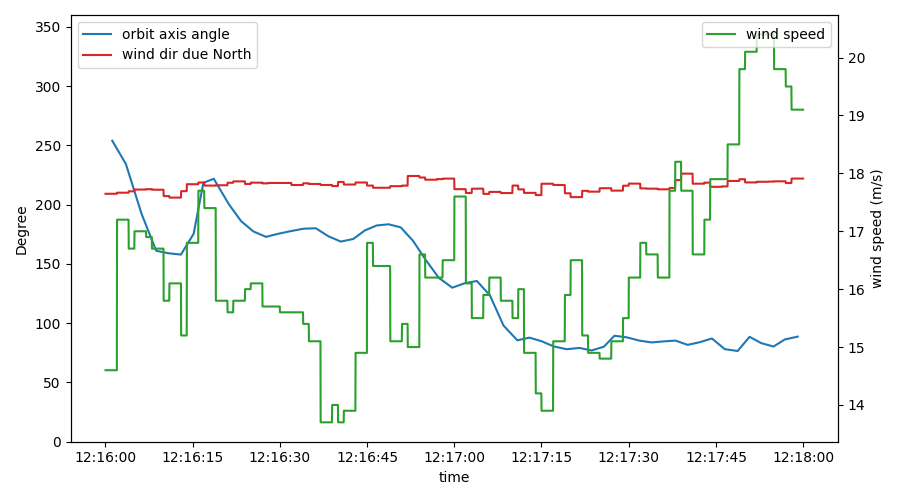

In [29]:
start = pd.to_datetime('2019-09-04 12:16 UTC')
end = pd.to_datetime('2019-09-04 12:18 UTC')

directionDF = create_direction_df(data, start, end)

report_plot(data, directionDF, start, end)

# Orbit angle spectrum

<IPython.core.display.Javascript object>


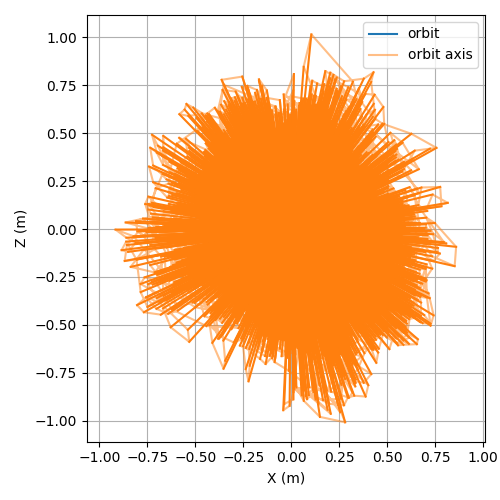

<IPython.core.display.Javascript object>


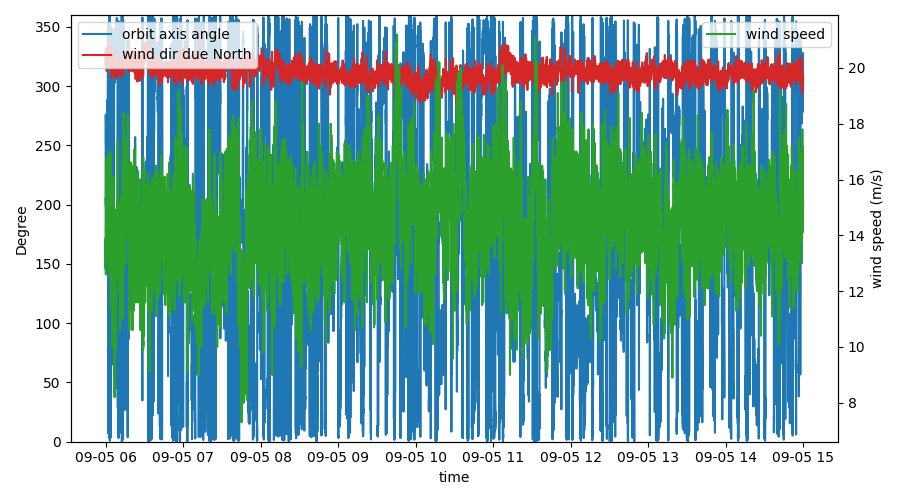

In [30]:
start = pd.to_datetime('2019-09-05 06:00 UTC')
end = pd.to_datetime('2019-09-05 15:00 UTC')

directionDF = create_direction_df(data, start, end)
report_plot(data, directionDF, start, end)

<IPython.core.display.Javascript object>


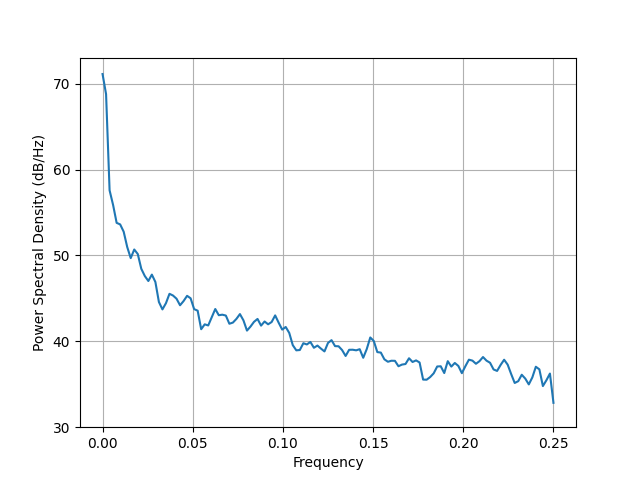

(array([1.29573588e+07, 7.56175451e+06, 5.72850106e+05, 3.86021045e+05,
        2.39701971e+05, 2.29889030e+05, 1.88983258e+05, 1.25472974e+05,
        9.30995708e+04, 1.17287551e+05, 1.03913394e+05, 6.99056423e+04,
        5.75782241e+04, 5.04048083e+04, 5.98180664e+04, 4.90587497e+04,
        2.87055309e+04, 2.35379052e+04, 2.78108452e+04, 3.57475388e+04,
        3.41528514e+04, 3.13632062e+04, 2.63025290e+04, 2.94363427e+04,
        3.38641387e+04, 3.17076441e+04, 2.37100193e+04, 2.27497718e+04,
        1.38361530e+04, 1.57671182e+04, 1.53081904e+04, 1.90459417e+04,
        2.37859173e+04, 2.01414618e+04, 2.04249806e+04, 1.99602018e+04,
        1.60255947e+04, 1.65245152e+04, 1.82501361e+04, 2.07622958e+04,
        1.75394307e+04, 1.33345870e+04, 1.48553853e+04, 1.68704652e+04,
        1.82281994e+04, 1.52393275e+04, 1.70141793e+04, 1.57891478e+04,
        1.67815787e+04, 2.00418786e+04, 1.64583697e+04, 1.36869151e+04,
        1.46934321e+04, 1.25240596e+04, 9.02802218e+03, 7.854894

In [163]:
plt.figure()
plt.psd(directionDF.angle.resample('2s').ffill().to_numpy()[1:], Fs=0.5)

<IPython.core.display.Javascript object>


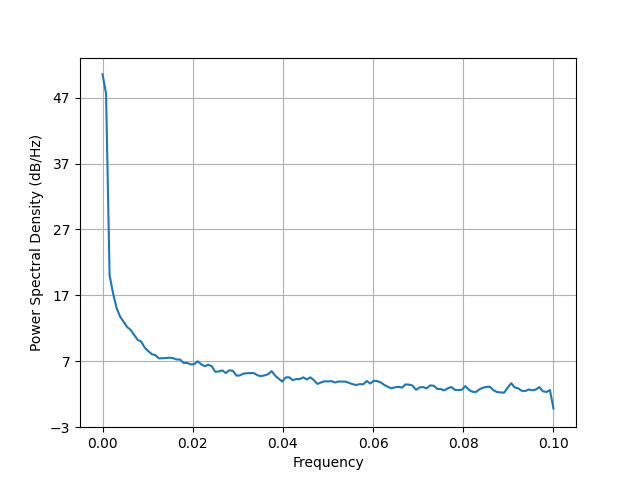

(array([1.13336854e+05, 5.74088576e+04, 1.00765322e+02, 5.33301316e+01,
        3.20395022e+01, 2.38073079e+01, 1.98155287e+01, 1.65717148e+01,
        1.49622650e+01, 1.25757408e+01, 1.05239330e+01, 9.96190784e+00,
        8.02979536e+00, 7.15005540e+00, 6.41504035e+00, 6.19782885e+00,
        5.54142434e+00, 5.57156928e+00, 5.61545841e+00, 5.67488810e+00,
        5.59773626e+00, 5.34144755e+00, 5.33679787e+00, 4.73123644e+00,
        4.73811077e+00, 4.50731525e+00, 4.51072231e+00, 5.01285954e+00,
        4.52726734e+00, 4.21316663e+00, 4.44994244e+00, 4.21341756e+00,
        3.47262407e+00, 3.51050102e+00, 3.64181604e+00, 3.32317093e+00,
        3.66237910e+00, 3.58802671e+00, 3.04194717e+00, 3.06191308e+00,
        3.25896730e+00, 3.30229509e+00, 3.32311655e+00, 3.30937397e+00,
        3.06727598e+00, 2.98758608e+00, 3.06441144e+00, 3.18992321e+00,
        3.56078493e+00, 3.03579874e+00, 2.74378335e+00, 2.46762223e+00,
        2.85474352e+00, 2.86685170e+00, 2.59074301e+00, 2.694277

In [165]:
plt.figure()
plt.psd(data.wind_speed.resample('5s').ffill().to_numpy()[1:], Fs=0.2)